#   مسئله طبقه بندی

.در این بخش ابتدا داده ها را می خوانیم سپس تعداد داد ه های موجود در هر کلاس را به صورت یک پلات نمایش می دهیم

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_excel('./Classification_Train.xlsx')

In [104]:
X = df.drop('Class_Label', axis=1)
y=df['Class_Label']

Index([1, 3, 2, 5, 4], dtype='int64', name='Class_Label')
[1056  923  479  468  373]


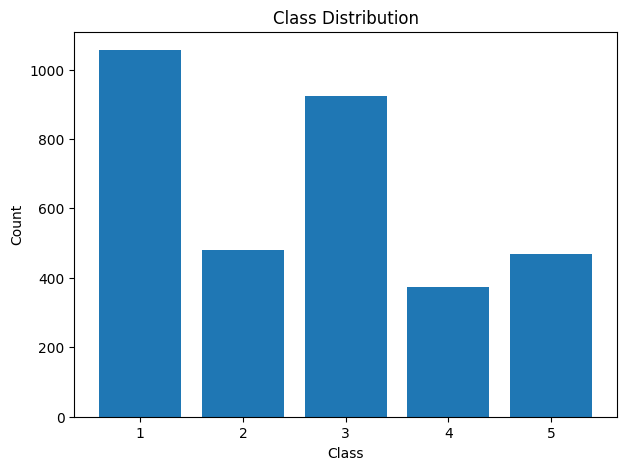

In [105]:
import matplotlib.pyplot as plt

class_counts = df['Class_Label'].value_counts()

# Extract the class labels and their corresponding counts
class_labels = class_counts.index
class_values = class_counts.values
print(class_labels)
print(class_values)
# Plot the class distribution
plt.figure(figsize=(7, 5))
plt.bar(class_labels, class_values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

همانطور که مشاهده می نمایید تعداد داده ها در کلاس های 1 و 3 بیشتر از بقیه ی کلاس ها می باشد و در واقع توزیع داده های ما در کلاس ها بالانس نمی باشد. بالانس نبودن داده ها باعث می شود مدل بر روی کلاس هایی که تعداد بیشتری داده دارند اورفیت شود و هنگام تست بقیه ی کلاس ها را به خوبی پیش بینی نکند و خطای تست افزایش یابد. به همین جهت داده ها را بالانس می کنیم.دو روش برای این کار وجود دارد: حذف داده از کلاس هایی که داده های بیشتری دارند یا افزایش داده ی کلاس هایی که داده ی کمتری دارند. در این مساله ما از روش دوم جهت بالانس کردن استفاده نمودیم چون تعداد داده های آموزش زیاد نمی باشد.

Index([3, 4, 5, 2, 1], dtype='int64', name='Class_Label')
[1056 1056 1056 1056 1056]


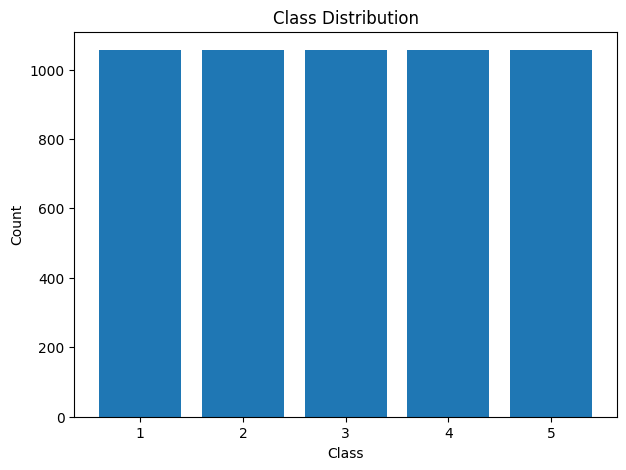

In [106]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_balanced, y_balanced = oversampler.fit_resample(X, y)

class_counts = y_balanced.value_counts()
class_labels = class_counts.index
class_values = class_counts.values
print(class_labels)
print(class_values)
plt.figure(figsize=(7, 5))
plt.bar(class_labels, class_values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

با استفاده از الگوریتم پی سی ای بعد داده ها را کاهش می دهیم تا بتوانیم نمایش دیگری از داده ها در دو بعد داشته باشیم. همانطور که مشاهده می کنید به نظر می رسد مرز بین کلاس ها مشخص است وبه ظاهر از هم جدا می باشند به همین دلیل از یه مدل خطی برای طبقه بندی استفاده می نماییم.

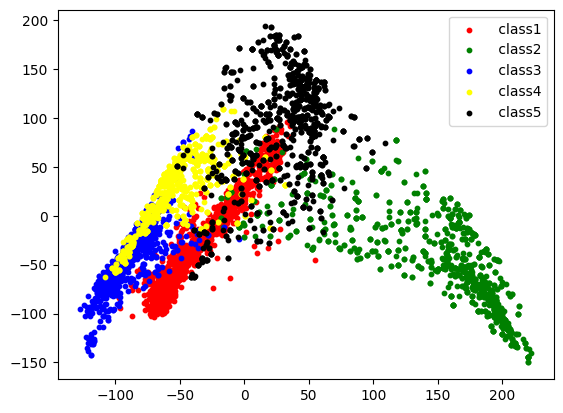

In [107]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_balanced)
# plot the results
colors = ['red', 'green','blue','yellow','black']
classes= ['class1','class2','class3','class4','class5']
for i in range(5):
    plt.scatter(reduced_data[y_balanced == i+1, 0],
                reduced_data[y_balanced == i+1, 1],
                s=10, c=colors[i],
                label=f' {classes[i]}')
plt.legend()
plt.show()

## Support Vector Machines (SVM):

In [108]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#Data normalization
scaler = MinMaxScaler()
X_balanced = scaler.fit_transform(X_balanced)

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=0)

model = SVC(kernel='rbf')
# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [109]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

correct_predictions = 0
incorrect_predictions = 0

# Counter for each class wrong predictions
class_errors = {class_label: 0 for class_label in set(y_test)}

# Iterate over y_test and y_pred
for true_label, predicted_label in zip(y_test, y_pred):
    if true_label == predicted_label:
        correct_predictions += 1
    else:
        incorrect_predictions += 1
        class_errors[true_label] += 1

print("Correct Predictions:", correct_predictions)
print("Incorrect Predictions:", incorrect_predictions)
print("Class Errors:")
for class_label, error_count in class_errors.items():
    print(f"Class {class_label}: {error_count} errors")

Accuracy: 0.9346590909090909
Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       209
           2       0.99      0.98      0.98       215
           3       0.85      0.94      0.89       207
           4       0.93      0.83      0.87       211
           5       0.94      0.96      0.95       214

    accuracy                           0.93      1056
   macro avg       0.94      0.93      0.93      1056
weighted avg       0.94      0.93      0.93      1056

Correct Predictions: 987
Incorrect Predictions: 69
Class Errors:
Class 1: 7 errors
Class 2: 5 errors
Class 3: 12 errors
Class 4: 36 errors
Class 5: 9 errors


با توجه به اینکه دقت مدل مطلوب نمی باشد شاید بتوان این نتیجه گیری را بنماییم که داده ها به صورت خطی از یکدیگر جدا نمی شوند و رابطه ی بین آن ها پیچیده تر می باشد. در این موارد الگوریتم رندوم فارست مناسب تر می باشد.

## Random Forest with Cross Validation

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_excel('./Classification_Train.xlsx')
X = df.drop('Class_Label', axis=1)
y = df['Class_Label']
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_balanced, y_balanced = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=0)

model = RandomForestClassifier()
# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Fit the model on the entire training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)



In [115]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

correct_predictions = 0
incorrect_predictions = 0
class_errors = {class_label: 0 for class_label in set(y_test)}

for true_label, predicted_label in zip(y_test, y_pred):
    if true_label == predicted_label:
        correct_predictions += 1
    else:
        incorrect_predictions += 1
        class_errors[true_label] += 1

print("Correct Predictions:", correct_predictions)
print("Incorrect Predictions:", incorrect_predictions)

print("Class Errors:")
for class_label, error_count in class_errors.items():
    print(f"Class {class_label}: {error_count} errors")

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Accuracy: 0.9801136363636364
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.97      0.98       209
           2       1.00      1.00      1.00       215
           3       0.98      0.96      0.97       207
           4       0.97      0.98      0.97       211
           5       0.97      1.00      0.98       214

    accuracy                           0.98      1056
   macro avg       0.98      0.98      0.98      1056
weighted avg       0.98      0.98      0.98      1056

Correct Predictions: 1035
Incorrect Predictions: 21
Class Errors:
Class 1: 7 errors
Class 2: 0 errors
Class 3: 8 errors
Class 4: 5 errors
Class 5: 1 errors
Cross-Validation Scores: [0.97278107 0.97514793 0.97869822 0.97278107 0.96563981]
Mean Cross-Validation Accuracy: 0.9730096188900417


همانطور که مشاهده می نمایید نتایج الگوریتم رندوم فارست بهتر از اس وی ام می باشد بنابراین تحلیل قبلی درست می باشد. داده های تست را جهت پیش بینی به الگوریتم می دهیم و نتیجه را ذخیره می نماییم.

In [117]:
#Test the model on the Classification_Test
df_test = pd.read_excel('./Classification_Test.xlsx')
y_test = model.predict(df_test)
print(y_test)

predictions_df = pd.DataFrame(y_test, columns=['Predicted_Label'])
# Save the predictions to an Excel file
predictions_df.to_excel('predictions.xlsx', index=False)

[3 3 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 3 3 4 4 4 4 4 4
 4 4 3 3 3 3 3 3 3 3 3 3 4 4 4 3 3 3 3 4 4 4 4 4 4 4 4 4 2 3 3 3 3 3 4 3 3
 3 3 4 4 4 4 4 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 2 2 2 2 3 3 3 3
 3 3 3 3 3 3 3 3 4 3 4 4 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 2 2 2
 3 3 3 3 3 3 3 3 3 3 3 4 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 4 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 3 3 3 2 2 2 3 3 3 3 3 3 3 3 3 3 3 5 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 3 3 3 3 3 5 5 5 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 5 3 3 3 3 3
 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 5 5 5 5 5 5 3 3 3 3 4 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 3 3 5 3 3 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 5 5 5 5 3 3 3 4 4 4 2
 2 2 2 2 3 3 3 3 5 5 5 5 5 5 5 5 5 5 3 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 3 3 3
 5 5 5 5 5 5 5 5 2 5 5 5 4 4 2 2 2 2 3 5 5 5 5 5 2 2 2 4 4 4 2 2 2 2 3 5 5
 5 5 5 5 2 2 2 4 4 4 4 4 2 2 2 2 2 2 5 5 5 5 5 5 5 5 2 2 4 4 4 4 3 3 3 2 2
 5 5 5 5 5 5 2 2 3 3 2 2 